In [130]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_file = pd.read_csv(city_data_to_load)
ride_file = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_file,city_file, how="left", on=["city"])
# Display the data table for preview
pyber_data.head(6)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban


## Bubble Plot of Ride Sharing Data

In [131]:
# Obtain the x and y coordinates for each of the three city types

# City Type
urban_cities=pyber_data[pyber_data["type"]=="Urban"]
suburban_cities=pyber_data[pyber_data["type"]=="Suburban"]
rural_cities=pyber_data[pyber_data["type"]=="Rural"]

# Average Fare Per City
urban_average_fare=urban_cities.groupby(["city"]).mean()["fare"]
suburban_average_fare=suburban_cities.groupby(["city"]).mean()["fare"]
rural_average_fare=rural_cities.groupby(["city"]).mean()["fare"]

# Total Number of Rides Per City
urban_rides=urban_cities.groupby(["city"]).count()["ride_id"]
suburban_rides=suburban_cities.groupby(["city"]).count()["ride_id"]
rural_rides=rural_cities.groupby(["city"]).count()["ride_id"]

# Total Number of Drivers Per City
urban_drivers=urban_cities.groupby(["city"]).mean()["driver_count"]
suburban_drivers=suburban_cities.groupby(["city"]).mean()["driver_count"]
rural_drivers=rural_cities.groupby(["city"]).mean()["driver_count"]

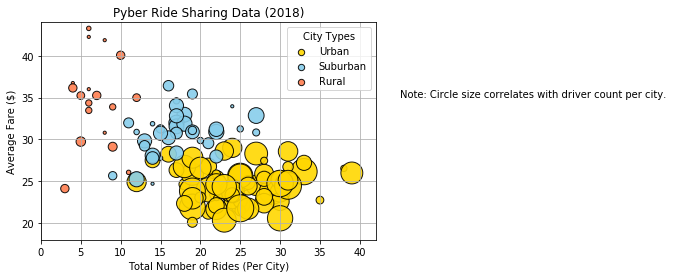

In [132]:
# Build the scatter plots for each city types
plt.scatter(urban_rides, urban_average_fare, alpha=0.9, edgecolor="black", linewidths=1, 
            marker="o", facecolors="gold", s=10*urban_drivers, label="Urban")

plt.scatter(suburban_rides, suburban_average_fare, alpha=0.9, edgecolor="black", linewidths=1, 
            marker="o", facecolors="skyblue", s=10*suburban_drivers, label="Suburban")

plt.scatter(rural_rides, rural_average_fare, alpha=0.9, edgecolor="black", linewidths=1, 
            marker="o", facecolors="coral", s=10*rural_drivers, label="Rural")

# Incorporate the other graph properties
plt.ylim(18,44)
plt.xlim(0,42)
plt.title("Pyber Ride Sharing Data (2018)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
description_box=plt.legend(loc="best", title="City Types")
description_box.legendHandles[0]._sizes=[40]
description_box.legendHandles[1]._sizes=[40]
description_box.legendHandles[2]._sizes=[40]

# Incorporate a text label regarding circle size
plt.text(45,35,"Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Bubble_Plot.png")

# Show Plot
plt.show()

## Total Fares by City Type

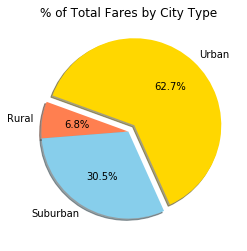

In [133]:
# Calculate Type Percents
type_percents=100*pyber_data.groupby(["type"]).sum()["fare"]/pyber_data["fare"].sum()

# Build Pie Chart
plt.pie(type_percents, shadow=True, startangle=160, explode=[0, 0, 0.1], labels=["Rural", "Suburban", "Urban"], 
        colors=["coral", "skyblue", "gold"], autopct='%.1f%%')
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Total Fares by City Type")

# Show Figure
plt.show()

## Total Rides by City Type

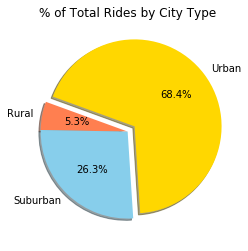

In [134]:
# Calculate Ride Percents
ride_percents=100*pyber_data.groupby(["type"]).count()["ride_id"]/pyber_data["ride_id"].count()

# Build Pie Chart
plt.pie(ride_percents, shadow=True, startangle=160, explode=[0, 0, 0.1], labels=["Rural", "Suburban", "Urban"], 
        colors=["coral", "skyblue", "gold"], autopct='%.1f%%')
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Total Rides by City Type")

# Show Figure
plt.show()

## Total Drivers by City Type

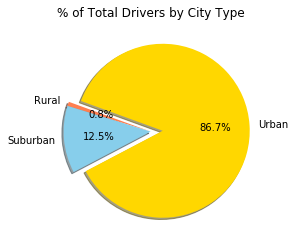

In [137]:
# Calculate Driver Percents
driver_percents=100*pyber_data.groupby(["type"]).sum()["driver_count"]/pyber_data["driver_count"].sum()

# Build Pie Chart
plt.pie(driver_percents, shadow=True, startangle=160, explode=[0, 0, 0.14], labels=["Rural", "Suburban", "Urban"], 
        colors=["coral", "skyblue", "gold"], autopct='%.1f%%')
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Total Drivers by City Type")

# Show Figure
plt.show()